In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris_dataset = load_iris()

In [13]:
type(iris_dataset) # sklearn.utils.bunch, akin to a dictionary. Access its contents like you would in a dictionary

sklearn.utils.Bunch

## Understanding the Dataset

In [16]:
print(f"Keys of iris dataset:")
print(iris_dataset.keys())

Keys of iris dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [23]:
print(f"The species of irises that we want to predict:")
print(iris_dataset['target_names'])

The species of irises that we want to predict:
['setosa' 'versicolor' 'virginica']


In [25]:
print(f"The feature of iris species that we were collected:")
print(iris_dataset['feature_names'])

The feature of iris species that we were collected:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Understanding the Data

In [26]:
iris_dataset['data'].shape

(150, 4)

In [29]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [30]:
iris_dataset['target'].shape

(150,)

In [31]:
# 0 -> setosa, 1 -> versicolor, 2 -> virginica
iris_dataset['target'][:5]

array([0, 0, 0, 0, 0])

## Train Test Split

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.2, random_state=0, stratify=iris_dataset['target'])

In [86]:
print("X_train and Y_train shapes: ")
print(X_train.shape)
print(Y_train.shape)
print("X_test and Y_test shapes: ")
print(X_test.shape)
print(Y_test.shape)

X_train and Y_train shapes: 
(120, 4)
(120,)
X_test and Y_test shapes: 
(30, 4)
(30,)


In [87]:
df_iris = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])

## Creating a Pairplot

In [88]:
df_iris_2 = pd.DataFrame(Y_train, columns=['species'])

In [89]:
df_iris_3 = pd.merge(df_iris, df_iris_2, left_index=True, right_index=True)

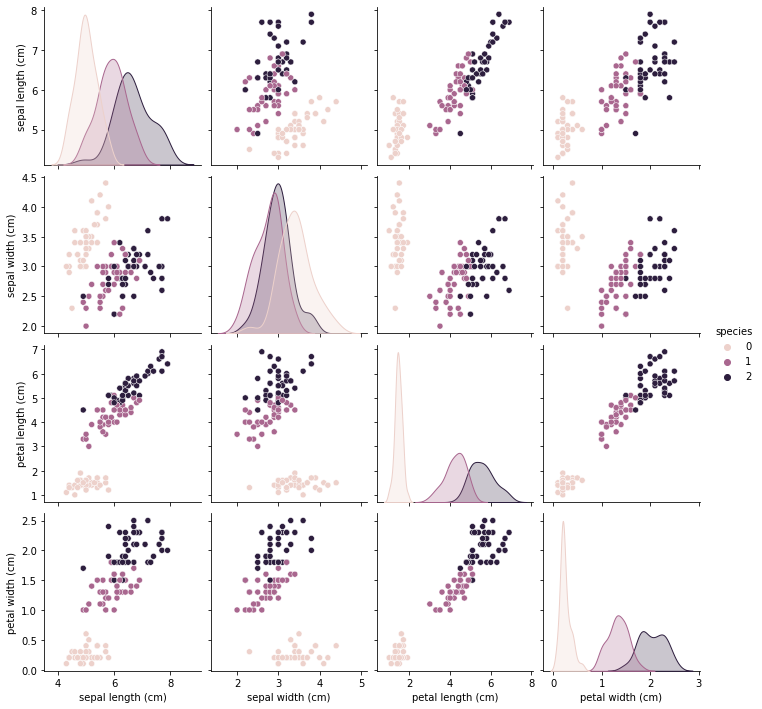

In [90]:
sns.pairplot(df_iris_3, hue='species')

## K-Nearest Neighbours

In [91]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [92]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [93]:
y_pred = knn.predict(X_test)

In [94]:
y_pred

array([0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 0])

In [95]:
round(np.mean(y_pred == Y_test), 2)

1.0

In [96]:
knn.score(X_test, Y_test)

1.0